## Image Processing 07

Wirapat Prigphet (Gene) 620510618 <br/>
Suppapich Seetasith (Yale) 620510626 <br/>
Pakin Siwatammarat (Pirch) 620510677

### Import Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from google.colab.patches import cv2_imshow

### Correlation

#### Usefulness 



*   Image Processing 
*   Template Matching 



#### Read image 

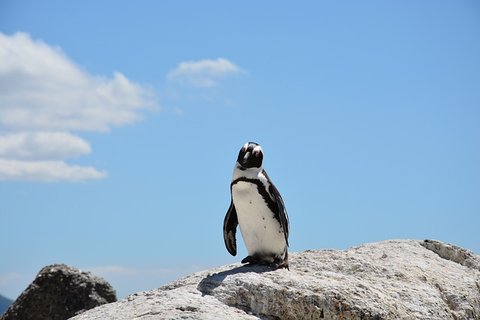

In [ ]:
img = cv2.imread('penguin.png')
cv2_imshow(img)

#### Processing

Sharpen


In [ ]:
kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
dst_sharpen = cv2.filter2D(img,-1,kernel)

Unsharp masking 5x5

In [ ]:
kernel = -(1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, -476, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])
dst_unsharp = cv2.filter2D(img,-1,kernel)

#### Display Result

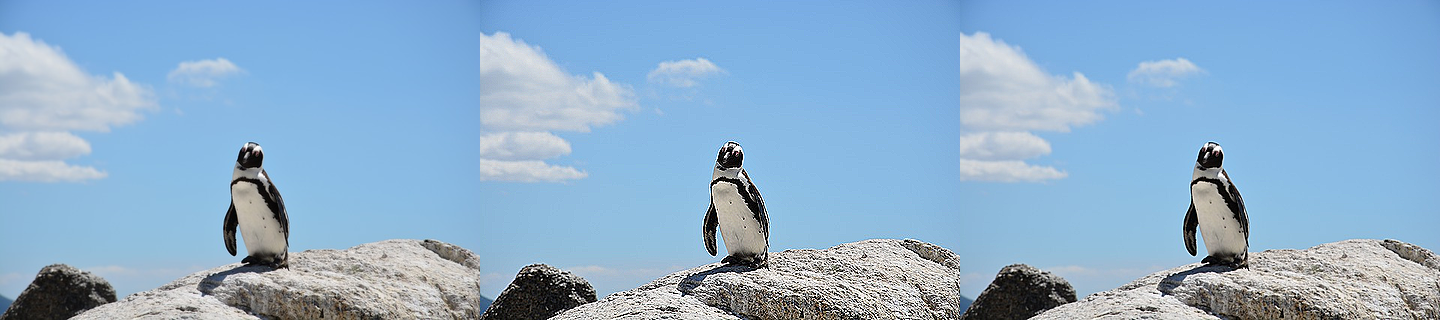

In [ ]:
img_corr = cv2.hconcat([img, dst_sharpen, dst_unsharp])
cv2_imshow(img_corr)

The leftmost image is original image.

The middle image is sharpen image.Line structures and other
details in an image are more enhanced.

The rightmost image is unsharpen image. It is greatly enhanced the appearance of detail, but It is not create additional detail when compare with sharpen image.

### Convolution with linear

#### Usefulness 




*   Edge Detection
*   Blur



#### Read image 

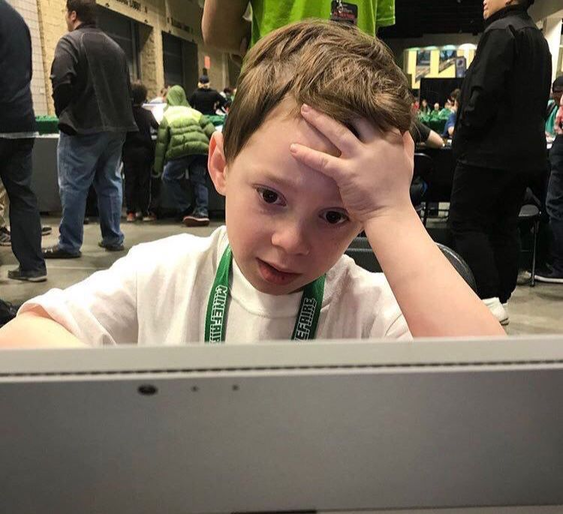

In [ ]:
img_g = cv2.imread("children.png")
img_gray = cv2.cvtColor(img_g, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_g)

#### Processing

Top Sobel

In [ ]:
kernel = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
flip_kernel = np.flipud(np.fliplr(kernel))
dst_top_sobel = cv2.filter2D(img_gray,-1,kernel)

Bottom Sobel

In [ ]:
kernel = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
flip_kernel = np.flipud(np.fliplr(kernel))
dst_bottom_sobel = cv2.filter2D(img_gray,-1,kernel)

Box Blur

In [ ]:
ksize_list = [3, 5, 9, 15, 35]
img_blur = []
for i in ksize_list:
  blur = cv2.blur(img_g, (i, i)) 
  img_blur.append(blur)

#### Display Result

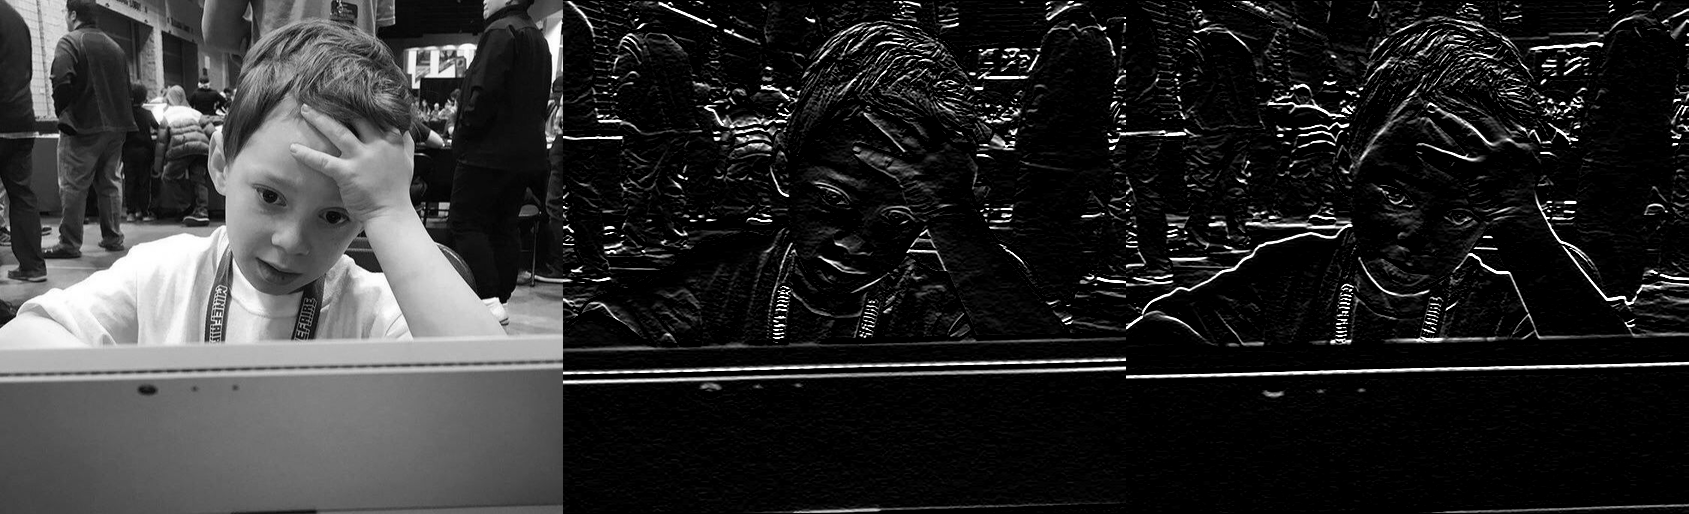

In [ ]:
img_sobel = cv2.hconcat([img_gray, dst_top_sobel, dst_bottom_sobel])
cv2_imshow(img_sobel)

After we do Edge Detection by using Top Sobel and Bottle Sobel and then compare with gray image. By the Top Sobel , the shadows detected in the image become white lines, making them more visible. In the other hand If use Bottom Sobel the edges of the shadowed image become dark. Edges in bright images are more visible.

kernel size =  3


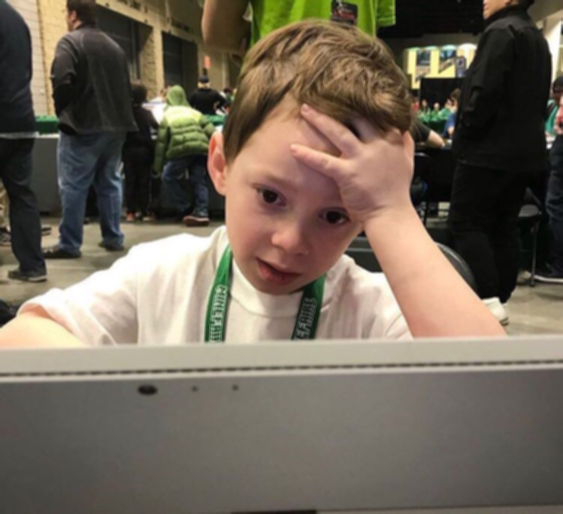

kernel size =  5


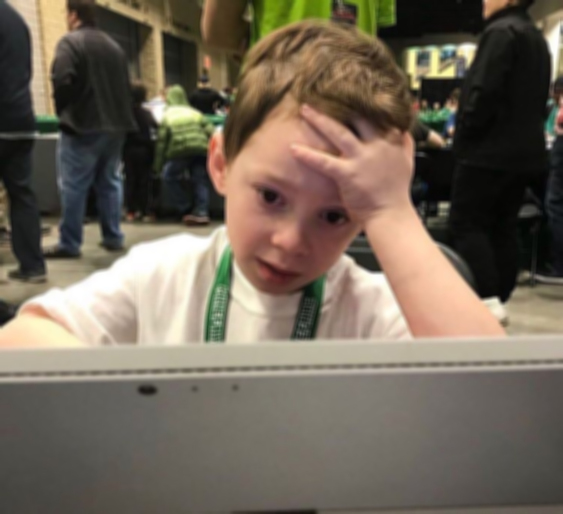

kernel size =  9


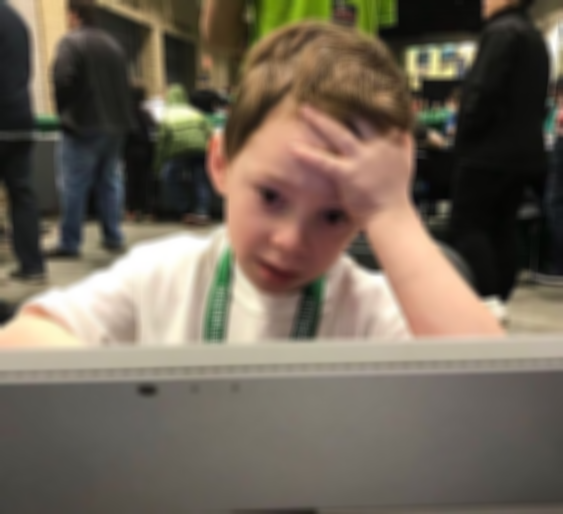

kernel size =  15


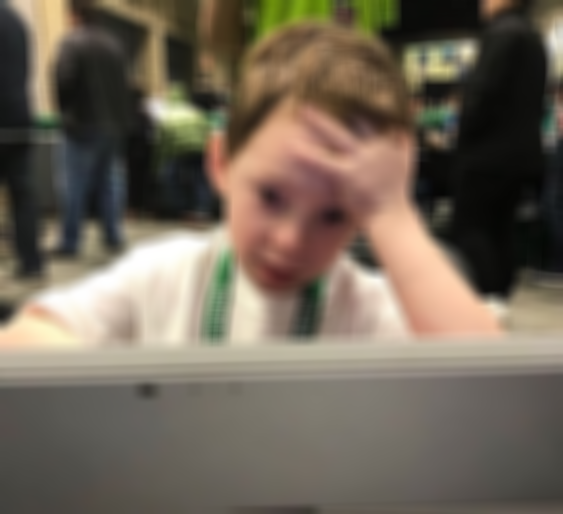

kernel size =  35


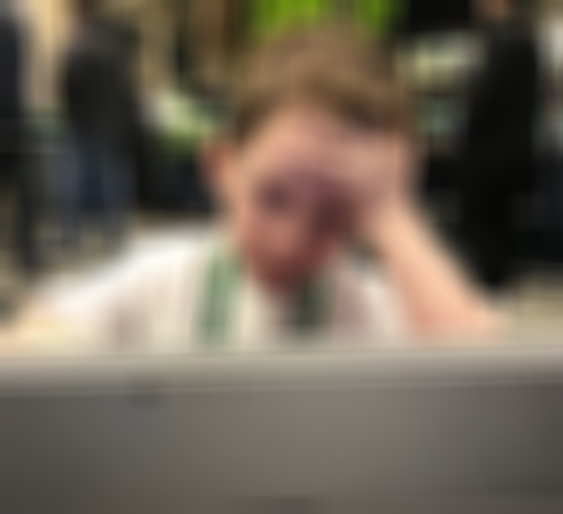

In [ ]:
for i in range(5):
  print("kernel size = ", ksize_list[i])
  cv2_imshow(img_blur[i])

So as the size of the kernel increases,  the more blurred your image will look.

### Convolution with nonlinear filter 

#### Usefulness 




*   Noise reduction


#### Read image 

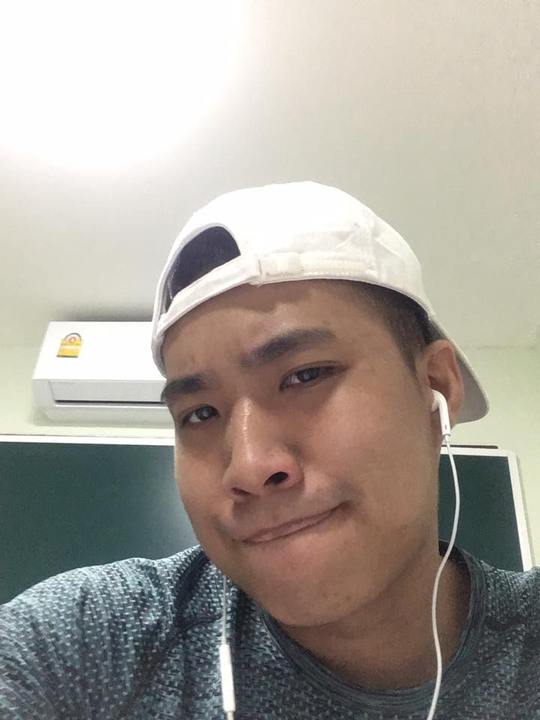

In [ ]:
img_y = cv2.imread("smart_guy.png")
cv2_imshow(img_y)

#### Add noises to image 

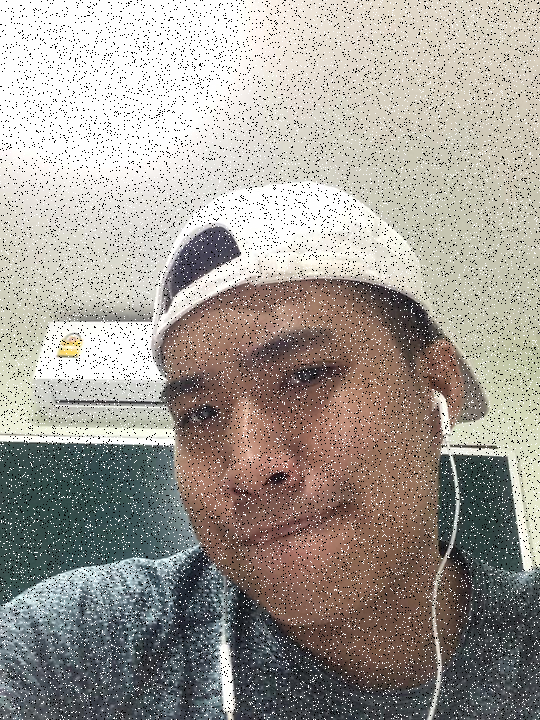

In [ ]:
import random
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
noise_img = sp_noise(img_y, 0.05)
cv2_imshow(noise_img)

#### Processing

In [ ]:
ksize_list = [3, 5, 9, 15, 35]
med_img = []
for i in ksize_list:
  img_median = cv2.medianBlur(noise_img, i) 
  med_img.append(img_median)

#### Display Result

kernel size =  3


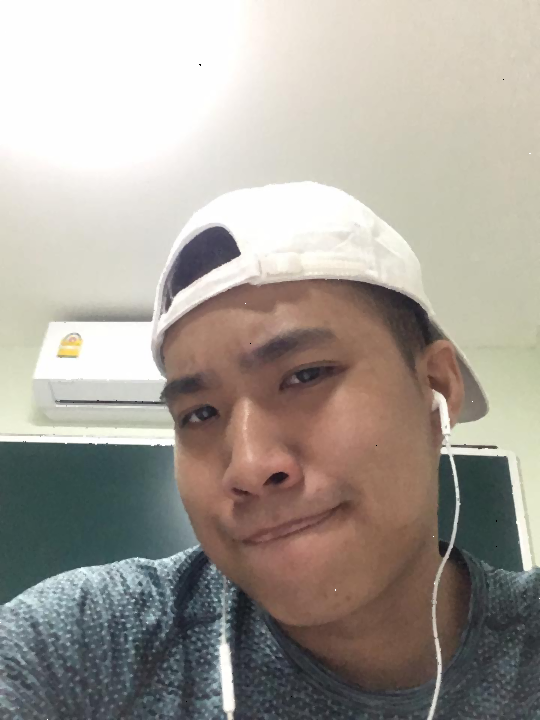

kernel size =  5


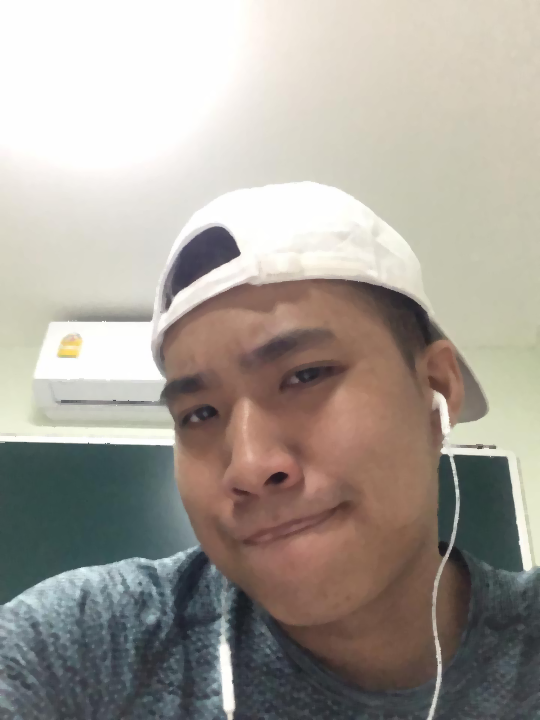

kernel size =  9


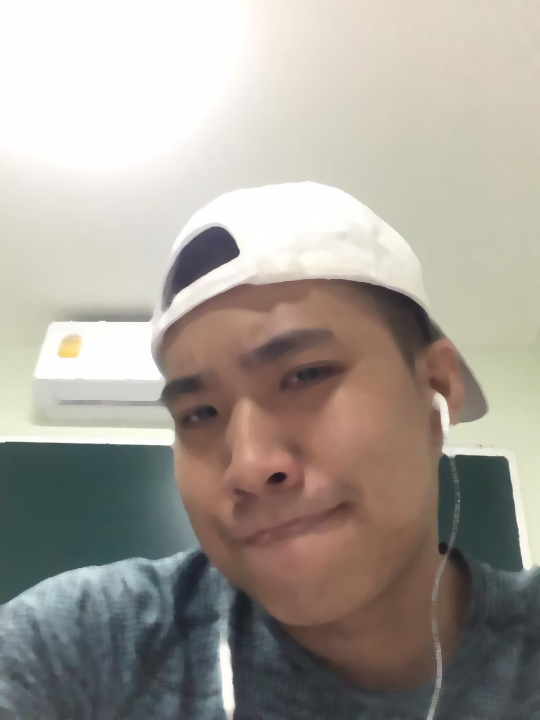

kernel size =  15


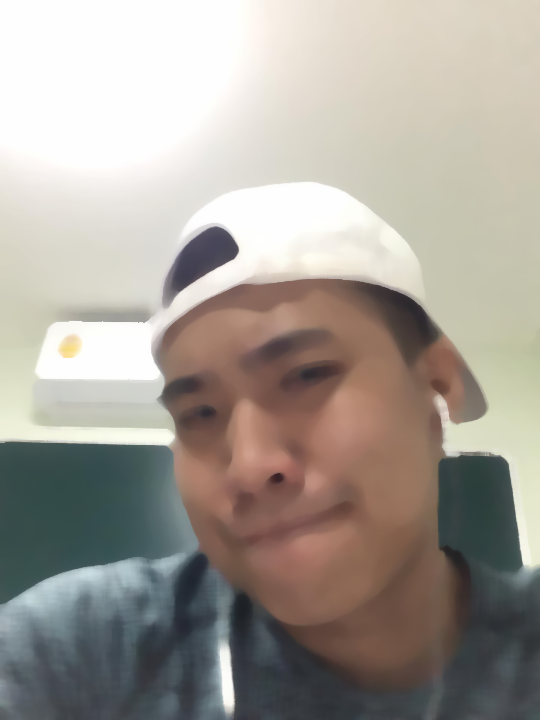

kernel size =  35


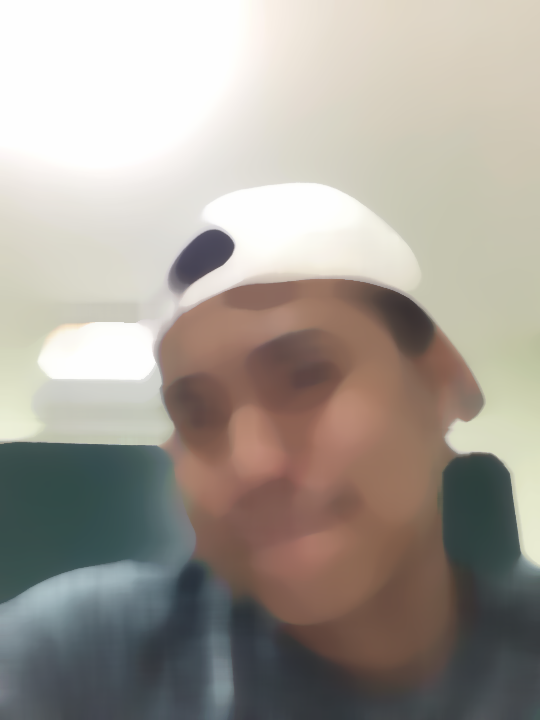

In [ ]:
for i in range(5):
  print("kernel size = ", ksize_list[i])
  cv2_imshow(med_img[i])

After we modifile for the first time we will see that almost noises are reduced and then if we keep increasing size of kernel. We will see that image getting blur and smooth. And you will see that object in image such as blackboard, cap and face of the handsome boy were clearly divided

### Reference

Jephraim Manansala. (2021, January 28). **Image Processing with Python: Image Effects using Convolutional Filters and Kernels | by Jephraim Manansala | The Startup**. Retrieved August 31, 2021, from Medium website: https://medium.com/swlh/image-processing-with-python-convolutional-filters-and-kernels-b9884d91a8fd


**OpenCV: Smoothing Images**. (2021). Retrieved August 31, 2021, from Opencv.org website: https://docs.opencv.org/4.5.2/d4/d13/tutorial_py_filtering.html

